<a href="https://colab.research.google.com/github/munkefrugt/StockPrograms/blob/main/ichimoku%2Bmacd%2Bderek_banas%2B_chat_gpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import yfinance as yf
import plotly.graph_objects as go

from plotly.subplots import make_subplots
import numpy as np

In [39]:
import yfinance as yf

start_date = '2023-01-22'
end_date = '2023-02-8'

df = yf.download(tickers="BTC-USD", start=start_date, end=end_date, interval='5m')




#df = yf.download(tickers="BTC-USD", period="60d", interval='5m')
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-22 00:00:00+00:00,22777.986328,22785.505859,22766.015625,22766.015625,22766.015625,0
2023-01-22 00:05:00+00:00,22780.322266,22826.087891,22780.322266,22826.087891,22826.087891,0
2023-01-22 00:10:00+00:00,22835.855469,22853.226562,22835.855469,22853.226562,22853.226562,0
2023-01-22 00:15:00+00:00,22856.291016,22858.021484,22843.357422,22843.357422,22843.357422,0
2023-01-22 00:20:00+00:00,22846.343750,22857.826172,22844.480469,22857.826172,22857.826172,0
...,...,...,...,...,...,...
2023-02-06 21:05:00+00:00,23011.330078,23011.330078,23000.140625,23000.140625,23000.140625,0
2023-02-06 21:10:00+00:00,22993.560547,22993.638672,22985.908203,22985.908203,22985.908203,67584
2023-02-06 21:15:00+00:00,22987.130859,22995.623047,22987.130859,22995.623047,22995.623047,22501376


In [40]:
# Calculate EMA 200
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()
df['EMA50'] = df['Close'].ewm(span=50, adjust=False).mean()
df['EMA5'] = df['Close'].ewm(span=5, adjust=False).mean()

# Calculate MACD
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [41]:

# Conversion
hi_val = df['High'].rolling(window=9).max()
low_val = df['Low'].rolling(window=9).min()
df['Conversion'] = (hi_val + low_val) / 2

# Baseline
hi_val2 = df['High'].rolling(window=26).max()
low_val2 = df['Low'].rolling(window=26).min()
df['Baseline'] = (hi_val2 + low_val2) / 2

# Span A
df['SpanA'] = ((df['Conversion'] + df['Baseline']) / 2).shift(26)

# Span B
hi_val3 = df['High'].rolling(window=52).max()
low_val3 = df['Low'].rolling(window=52).min()
df['SpanB'] = ((hi_val3 + low_val3) / 2).shift(26)

# Lagging Span
df['Lagging'] = df['Close'].shift(-26)




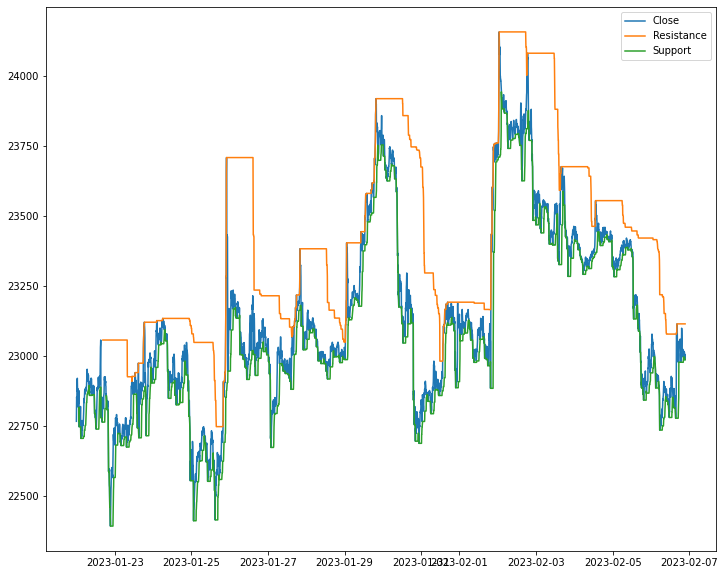

In [50]:
#calc resistance lines: 
import pandas as pd
import matplotlib.pyplot as plt

# Load data

# Calculate rolling max and min for the closing prices
df['rolling_max'] = df['Close'].rolling(window=200).max()
df['rolling_min'] = df['Close'].rolling(window=20).min()

# Plot the closing prices and the calculated support and resistance lines
plt.figure(figsize=(12, 10))

plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['rolling_max'], label='Resistance')
plt.plot(df.index, df['rolling_min'], label='Support')
plt.legend()
plt.show()


#Make signals

In [43]:
# my rules: 


# Add a rule to only take trades if the close price hasn't just reached EMA200
#recent_points = 5
#df['Long_Entry'] = np.where(
#  df['Close'] >= df['rolling_max'], 
  #(df['MACD'] < 0) & (df['Signal'] < 0) & 
  #(df['MACD'].shift(1) < df['Signal'].shift(1)) & 
  #(df['MACD'] > df['Signal']) &
  #(df['Close'] > df['EMA200']),# &
  #(df['Close'].rolling(recent_points).min() >= df['EMA200']),# &
  #(df['SpanA'] > df['SpanB']), #&

  #(df['Lagging'] > df['Close']) &
  #(df['Lagging'].shift(1) > df['Close'].shift(1)),

 # 1, 0) 



In [46]:
#current rules: 
#df['rolling_max'] = df['Close'].rolling(window=200).max()
df['Long_Entry'] = 0

df['Long_Entry'] = np.where(
    (df['Close'] > df['rolling_max'].shift(10)) &
    (df['Close'] > df['rolling_max'].shift(1)) &
  
    (df['Lagging'] > df['Close'])
    ,1,0)
  #(df['Close'].shift(1) < df['rolling_max'].shift(1)) &
  #df['rolling_max'] == df['rolling_max'].shift(10)

buy_signals = df[df['Long_Entry'] == 1]
num_long_entries = df['Long_Entry'].sum()
print("Number of long entries:", num_long_entries)

Number of long entries: 58


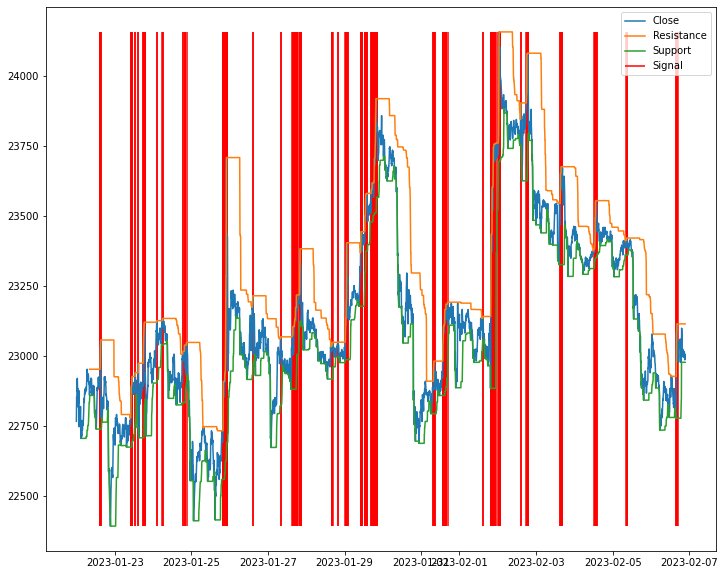

In [53]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate rolling max and min for the closing prices
df['rolling_max'] = df['Close'].rolling(window=100).max()
df['rolling_min'] = df['Close'].rolling(window=40).min()

# Add a new column to keep track of signals
df['signal'] = 0

# Check if the previous signal is not triggered
df.loc[(df['Close'] > df['rolling_max'].shift(10)) & (df['signal'].shift(1) == 0), 'signal'] = 1

# Reset signal when the price falls below the rolling minimum
df.loc[(df['Close'] < df['rolling_min']) & (df['signal'] == 1), 'signal'] = 0

# Plot the closing prices and the calculated support and resistance lines
plt.figure(figsize=(12, 10))

plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['rolling_max'], label='Resistance')
plt.plot(df.index, df['rolling_min'], label='Support')

# Plot signals as vertical lines
plt.vlines(df.index[df['signal'] == 1], ymin=df['rolling_min'].min(), ymax=df['rolling_max'].max(), color='red', label='Signal')

plt.legend()
plt.show()





#Plot Ichimoku


In [49]:
import plotly.graph_objects as go
import pandas as pd
from plotly.subplots import make_subplots
# Load data
#df = df.copy()

#fig = make_subplots(rows=2, cols=1, vertical_spacing=0.065, shared_xaxes=True)
fig = make_subplots(rows=2, cols=1, vertical_spacing=0.065, shared_xaxes=True, row_heights=[0.8, 0.2])


#add buy signals: 

# buy signal
fig.add_trace(
    go.Scatter(x=buy_signals.index, y=buy_signals['Close'], mode='markers',
                  marker=dict(size=30, color='green', symbol='triangle-up')),1,1)


#support /resistance

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.rolling_max),line=dict(color='green', width=4), name='Resistance'), 1, 1)

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.rolling_min),line=dict(color='red', width=2), name='Support'), 1, 1)


#top plot   price + ema + ichimoku

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.Close),line=dict(color='blue', width=1), name='Close'), 1, 1)

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.EMA200),line=dict(color='red', width=1), name='EMA200' ), 1, 1)

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.Lagging),line=dict(color='pink', width=2), name='Lagging'), 1, 1)

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.Conversion),line=dict(color='purple', width=1), name='Conversion'), 1, 1)

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.Baseline),line=dict(color='orange', width=1), name='Baseline'), 1, 1)

#cloud
fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.SpanA), line=dict(color='green', width=1), name = "spanA"), 1, 1)

fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.SpanB), fill='tonexty', fillcolor='rgba(128,128,128,0.2)',
               line=dict(color='red', width=1), name = "spanB"), 1, 1)


#second plot
fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.MACD),line=dict(color='orange', width=1), name='MACD'), 2, 1);
fig.add_trace(
    go.Scatter(x=list(df.index), y=list(df.Signal),line=dict(color='blue', width=1), name='Signal'), 2, 1);



fig.update_layout(
    title_text="closing price + ichimoku")
fig.update_layout(height=1000, width=1200, showlegend=True)
fig.update_layout(
    plot_bgcolor='#161618'  # set the background color to light blue
)
fig.update_layout(
    paper_bgcolor='#161618'
)
fig.update_layout(
    xaxis=dict(gridcolor='gray', gridwidth=0.5),
    yaxis=dict(gridcolor='gray', gridwidth=0.5)
)
fig.update_layout(
    font=dict(
        color='white'
    )
)
fig.update_layout(
    xaxis=dict(
        type="date"),
    xaxis2_rangeslider_visible=True,
    xaxis2_type="date"
    );
fig.show()
